Importing required dependencies

In [1]:
import tensorflow as tf
import numpy as np
import logging

In [2]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Setting up the Training Data

In [3]:
celsius_data = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahreinheit_data = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)
for i,c in enumerate(celsius_data):
    print("{} degrees Celsius = {} degrees Fahreinheit".format(c, fahreinheit_data[i]))

-40.0 degrees Celsius = -40.0 degrees Fahreinheit
-10.0 degrees Celsius = 14.0 degrees Fahreinheit
0.0 degrees Celsius = 32.0 degrees Fahreinheit
8.0 degrees Celsius = 46.0 degrees Fahreinheit
15.0 degrees Celsius = 59.0 degrees Fahreinheit
22.0 degrees Celsius = 72.0 degrees Fahreinheit
38.0 degrees Celsius = 100.0 degrees Fahreinheit


Creating the Model

In [4]:
l0 = tf.keras.layers.Dense(units = 1, input_shape=[1])

Assemble the layers into a model

In [5]:
model = tf.keras.Sequential([l0])

Compiling the model, with loss and optimizer functions

In [6]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

Training the model

In [7]:
history = model.fit(celsius_data, fahreinheit_data, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


Display training statistics

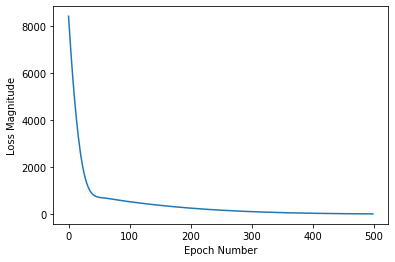

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Using the model to predict values

In [9]:
a = float(input("Enter temperature value in celsius: "))
print("The predicted value in fahreinheit according to the model is: {}".format(model.predict([a])))

The predicted value in fahreinheit according to the model is: [[110.65987]]


Looking at the layer variables

In [10]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8293571]], dtype=float32), array([28.338793], dtype=float32)]


Adding Multiple layers to the model

In [11]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_data, fahreinheit_data, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.12334993, -0.6956842 ,  0.05118338,  0.4120031 ]],
      dtype=float32), array([ 2.2690215, -3.2995183, -2.123419 ,  3.161677 ], dtype=float32)]
These are the l1 variables: [array([[-0.6455127 , -0.1728676 ,  0.10895685,  0.83964413],
       [ 0.01860064,  1.1154822 , -0.29093313, -0.30069077],
       [ 0.64818853, -0.14465094, -0.99230987, -0.30010283],
       [-0.43949705, -0.32137284,  0.97233725, -0.29366395]],
      dtype=float32), array([-3.041755 , -3.1870644,  2.9085994,  3.1811218], dtype=float32)]
These are the l2 variables: [array([[-0.7972094 ],
       [-1.3116362 ],
       [ 1.0650896 ],
       [ 0.45258483]], dtype=float32), array([3.132451], dtype=float32)]
